# <span style="color:#54B1FF">Preprocessing:</span> &nbsp; <span style="color:#1B3EA9"><b>Mapping To A Gaussian Distribution</b></span>

<br>

It can often be desireable to transform data into a Gaussian (or "normal") distribution. One reason that this is desireable is that a variety of machine learning algorithms use the known probabilistic properties of Gaussian distributions to accelerate calculations.



<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing


<br>

One way to map data to a Gaussian distribution is to use the Box-Cox transformation. This transformation is implemented in `preprocessing.PowerTransformer` and can be executed as follows:

<br>

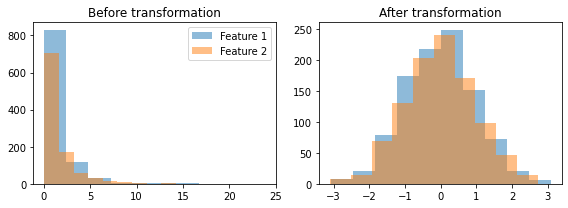

In [2]:

transformer = preprocessing.PowerTransformer(method='box-cox', standardize=False)

np.random.seed(0)
a  = np.random.lognormal( size=(1000,2) )
b  = transformer.fit_transform( a )


fig,ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist( a[:,0], alpha=0.5, label='Feature 1' )
ax[0].hist( a[:,1], alpha=0.5, label='Feature 2' )
ax[1].hist( b[:,0], alpha=0.5 )
ax[1].hist( b[:,1], alpha=0.5 )
ax[0].set_title('Before transformation')
ax[1].set_title('After transformation')
ax[0].legend()
plt.tight_layout()
plt.show()

<br>
<br>

The data follow a very close-to-normal distribution following transformation. 

However, note that the Box-Cox procedure does not necessarily work for all input distributions. For example, if you start with the uniform distribution (`np.random.rand`), the output of the Box-Cox transform will not be normal:

<br>
<br>

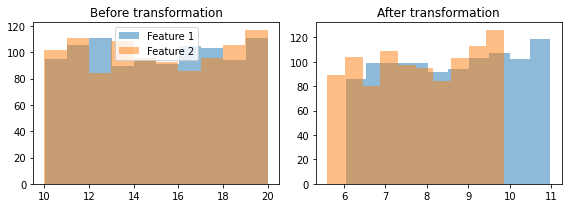

In [3]:

transformer = preprocessing.PowerTransformer(method='box-cox', standardize=False)

np.random.seed(0)
a  = 10 + 10 * np.random.rand( 1000, 2 )
b  = transformer.fit_transform( a )


fig,ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist( a[:,0], alpha=0.5, label='Feature 1' )
ax[0].hist( a[:,1], alpha=0.5, label='Feature 2' )
ax[1].hist( b[:,0], alpha=0.5 )
ax[1].hist( b[:,1], alpha=0.5 )
ax[0].set_title('Before transformation')
ax[1].set_title('After transformation')
ax[0].legend()
plt.tight_layout()
plt.show()



<br>
<br>

⚠️ It is very important to always check the data distribution, both before and after the transformation, because the result might not be what you expect!

<br>
<br>

Although the Box-Cox transformation does not work well for transforming uniformly distributed data to normally distributed data, the `QuantileTransformer` algorithm does much better:

<br>
<br>


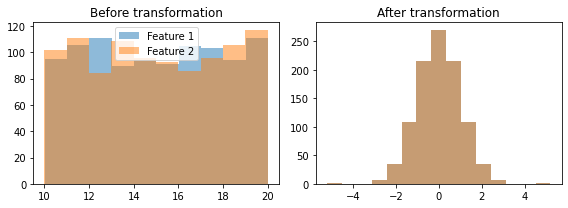

In [4]:

transformer = preprocessing.QuantileTransformer(output_distribution='normal')

np.random.seed(0)
a  = 10 + 10 * np.random.rand( 1000, 2 )
b  = transformer.fit_transform( a )


fig,ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist( a[:,0], alpha=0.5, label='Feature 1' )
ax[0].hist( a[:,1], alpha=0.5, label='Feature 2' )
ax[1].hist( b[:,0], alpha=0.5, bins=15 )
ax[1].hist( b[:,1], alpha=0.5, bins=15 )
ax[0].set_title('Before transformation')
ax[1].set_title('After transformation')
ax[0].legend()
plt.tight_layout()
plt.show()

